In [29]:
import pandas as pd

# Daftar nama file CSV
files = ['data_banjir_pengungsian/data-banjir-jakarta-2018.csv', 'data_banjir_pengungsian/data-banjir-jakarta-2019.csv', 'data_banjir_pengungsian/data-banjir-jakarta-2020.csv']

# Membaca file CSV dan menyimpannya dalam list
dfs = []
for file in files:
    df = pd.read_csv(file)
    dfs.append(df)

# Menggabungkan DataFrame menjadi satu
merged_df = pd.concat(dfs)

# Menampilkan hasil penggabungan
merged_df

,Unnamed: 0,kota_administrasi,kecamatan,kelurahan,rw,jumlah_terdampak_rw,jumlah_terdampak_rt,jumlah_terdampak_kk,jumlah_terdampak_jiwa,ketinggian_air,tanggal_kejadian,lama_genangan,jumlah_meninggal,jumlah_hilang,jumlah_luka_berat,jumlah_luka_ringan,jumlah_pengungsi_tertinggi,jumlah_tempat_pengungsian,nilai_kerugian,Unnamed: 0.1
0,0,Jakarta Barat,PENJARINGAN,KAMAL MUARA,"01, 04",2,12,0,0,20 - 30 cm,02 januari 2018,0,0,0,0,0,0,0,0,NaN
1,1,Jakarta Utara,KALIDERES,KAMAL,"1, 4",2,3,0,0,10 - 25 cm,"03, 04, 05, 18, 31 januari 2018",0,0,0,0,0,0,0,0,NaN
2,2,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR BARU,1,1,2,0,0,15 cm,03 januari 2018,0,0,0,0,0,0,0,0,NaN
3,3,Jakarta Utara,GROGOL PETAMBURAN,JELAMBAR,7,1,1,0,0,20 cm,03 januari 2018,0,0,0,0,0,0,0,0,NaN
4,4,Jakarta Utara,KEMBANGAN,KEMBANGAN UTARA,"3, 4, 5, 6",4,2,0,0,5 - 20 cm,18 januari 2018,0,0,0,0,0,0,0,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001,42,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,10 - 15 cm,15 desember 2020,0,0,0,0,0,0,0,0,1001.0
1002,43,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,5 - 20 cm,15 desember 2020,0,0,0,0,0,0,0,0,1002.0
1003,44,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,0,0,1,0,0,15 cm,15 desember 2020,0,0,0,0,0,0,0,0,1003.0
1004,45,Kepulauan Seribu,KEPULAUAN SERIBU UTARA,PULAU HARAPAN,RW : 02,1,1,0,0,5 cm,15 desember 2020,0,0,0,0,0,0,0,0,1004.0


In [30]:
# Grouping berdasarkan kota_administrasi dan menghitung jumlah_tempat_pengungsian
grouped = df.groupby('kota_administrasi')['jumlah_tempat_pengungsian'].count().reset_index()

grouped

,kota_administrasi,jumlah_tempat_pengungsian
0,Jakarta Barat,187
1,Jakarta Pusat,37
2,Jakarta Selatan,301
3,Jakarta Timur,389
4,Jakarta Urata,2
5,Jakarta Utara,77
6,Kepulauan Seribu,13


In [31]:
tanggal = merged_df['tanggal_kejadian'].to_numpy()
tahun = []
for i in range(len(tanggal)) : 
    tanggal_split = tanggal[i].split()
    data = tanggal_split[-1]
    if data == "november" :
        data = 2020
    tahun.append(data)
    
merged_df['tahun'] = tahun

In [49]:
# Grouping berdasarkan 'kota_administrasi' dan 'tahun', dan menghitung jumlah pengungsian
result = merged_df.groupby(['kota_administrasi','kecamatan', 'tahun'])['jumlah_tempat_pengungsian'].count().reset_index()
# Menghapus baris dengan nilai 'Kepulauan Seribu' di kolom 'kota_administrasi'
result = result.drop(result[result['kota_administrasi'] == 'Kepulauan Seribu'].index)
result = result.drop(result[result['kota_administrasi'] == 'Jakarta Urata'].index)
# Menghapus baris dengan nilai 'Jakarta Utara' pada kolom 'kota_administrasi' dan nilai 1 pada kolom 'tahun'
result = result.drop(result[(result['kota_administrasi'] == 'Jakarta Utara') & (result['tahun'] == 2020)  & (result['jumlah_tempat_pengungsian'] == 1)].index)
result

,kota_administrasi,kecamatan,tahun,jumlah_tempat_pengungsian
0,Jakarta Barat,CENGKARENG,2018,5
1,Jakarta Barat,CENGKARENG,2020,42
2,Jakarta Barat,GROGOL PETAMBURAN,2018,2
3,Jakarta Barat,GROGOL PETAMBURAN,2020,14
4,Jakarta Barat,KALIDERES,2018,2
...,...,...,...,...
126,Jakarta Utara,KOJA,2020,9
127,Jakarta Utara,PADEMANGAN,2020,8
128,Jakarta Utara,PENJARINGAN,2018,3
129,Jakarta Utara,PENJARINGAN,2020,29


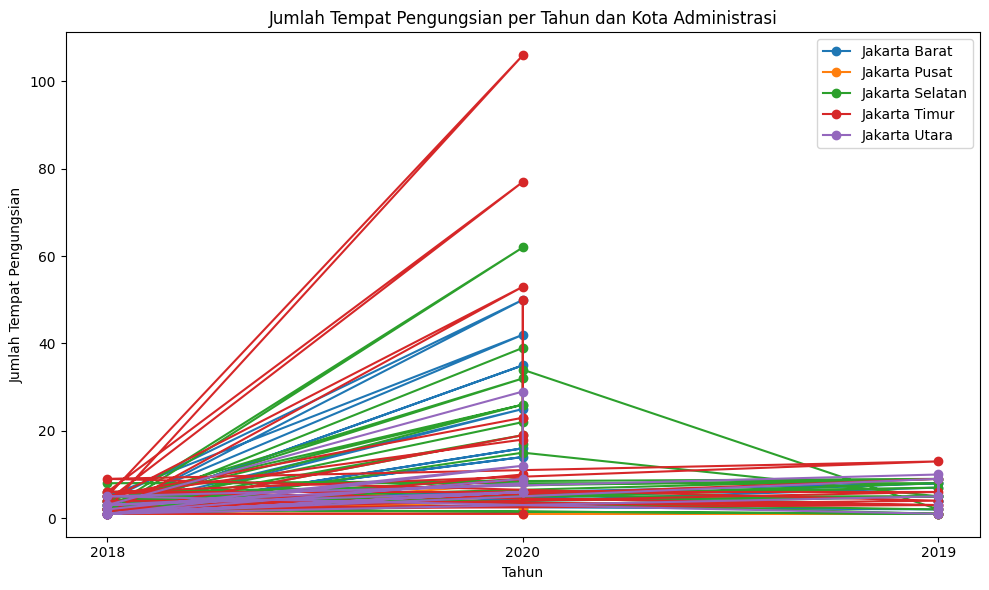

In [50]:
import matplotlib.pyplot as plt

# Membuat bar plot
plt.figure(figsize=(10, 6))
for kota in result['kota_administrasi'].unique():
    kota_data = result[result['kota_administrasi'] == kota]
    plt.plot(kota_data['tahun'], kota_data['jumlah_tempat_pengungsian'], marker='o', label=kota)
plt.xlabel('Tahun')
plt.ylabel('Jumlah Tempat Pengungsian')
plt.title('Jumlah Tempat Pengungsian per Tahun dan Kota Administrasi')
plt.legend()
plt.tight_layout()
plt.show()